# Executing a linear regression

In [1]:
#import libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Read in data that has columns such as age, sex, bmi, insurance cost etc.
data = pd.read_csv('insurance.csv')

In [3]:
#view our data
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
#what do our columns look like
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Labelling
Since three columns have text, we need to convert those into numerals.Importing labelencoder here to convert text into numbers. It labels yes as 1 and no as 0. This code borrowed from https://www.kaggle.com/hely333/eda-regression

In [5]:
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [6]:
#let us see if it worked
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
data['sex'].value_counts()
#our data set has nearly equal count of men and women

1    676
0    662
Name: sex, dtype: int64

In [8]:
data['smoker'].value_counts()
#we have nearly five times non-smokers versus smokers in this data. Who are they? 

0    1064
1     274
Name: smoker, dtype: int64

In [9]:
#number of men who smoke
data[(data['smoker']==1) & (data['sex']==1)].count()

age         159
sex         159
bmi         159
children    159
smoker      159
region      159
charges     159
dtype: int64

In [10]:
#number of women who are smokers
data[(data['smoker']==1) & (data['sex']==0)].count()

age         115
sex         115
bmi         115
children    115
smoker      115
region      115
charges     115
dtype: int64

What is the correlation between charges and independent variables

In [11]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

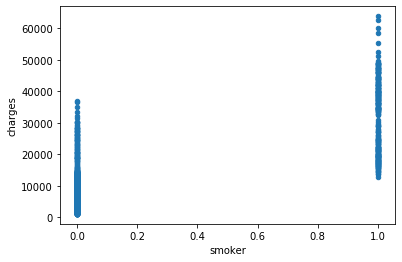

In [12]:
data.plot(x='smoker', y = 'charges', kind='scatter')
#smoker pay way higher than non-smokers

As it is clear that the insurance cost is greatly dependent on smoking. A smoker pays more than a non-smoker

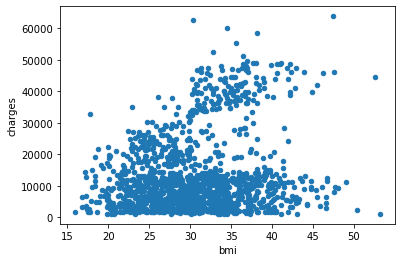

In [13]:
#what about bmi
data.plot(x='bmi', y = 'charges', kind='scatter')



People with bmi above 30 end up paying more because bmi of 30 or above is considered obese

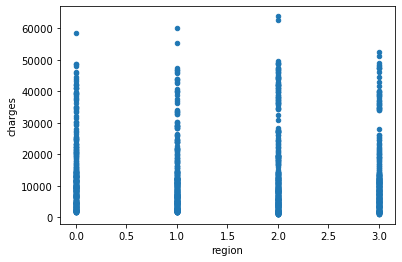

In [14]:
# what about region
data.plot(x='region', y = 'charges', kind='scatter')


Hard to tell how insurance costs depend on region

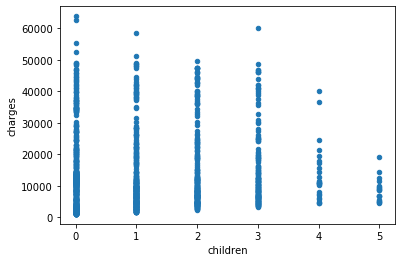

In [15]:
#children
data.plot(x='children', y = 'charges', kind='scatter')

# 
Our data set consists of a lot of people who don't have children. But how many

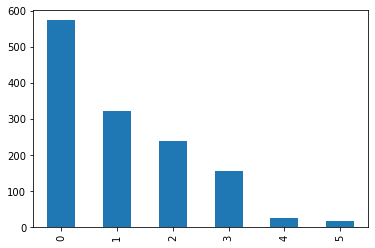

In [16]:
data.children.value_counts().plot(kind='bar')

# Basic linear regression 

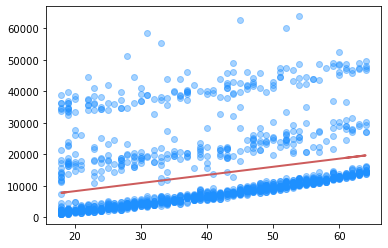

In [17]:
#Make a linear regression between charges and age

#setting variables
x = data[['age']].values
y = data[['charges']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

### make the scatter in Blue
plt.scatter(x,y,color='dodgerblue',alpha=.4)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# Set up our stats model

In [18]:
## set up for stats models
x_stats = data[['age']].values
y_stats = data[['charges']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.89e-29
Time:                        21:51:13   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
x1           257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#setting up the model for multiple regression
x_stats = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y_stats = data[['charges']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome
## so here the relationship is 9%, which is not good at all

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:51:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
x1           257.2881     11.886     21.647      0.000     233.971     280.605
x2          -131.1106    332.811     -0.394      0.694    -784.001     521.780
x3           332.5701     27.722     11.997      0.000     278.186     386.954
x4           479.3694    137.644      3.483      0.001     209.346     749.393
x5          2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
x6          -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We gathered from above that smoking, children and region are stronger variables than age, sex and bmi in our insurance cost prediction. Let us try those three variables out in our analysis.


In [20]:
#setting up the model for multiple regression
x_stats = data[['children', 'smoker', 'region']].values
y_stats = data[['charges']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome
## so here the relationship is 9%, which is not good at all

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     736.8
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          1.97e-282
Time:                        21:51:13   Log-Likelihood:                -13824.
No. Observations:                1338   AIC:                         2.766e+04
Df Residuals:                    1334   BIC:                         2.768e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7846.4499    402.679     19.486      0.000    7056.497    8636.403
x1           623.3632    168.764      3.694      0.000     292.292     954.435
x2           2.36e+04    503.887     46.839      0.000    2.26e+04    2.46e+04
x3           -60.5096    184.126     -0.329      0.742    -421.718     300.699
==============================================================================
Omnibus:                      139.656   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.443
Skew:                           0.740   Prob(JB):                     2.23e-48
Kurtosis:                       4.321   Cond. No.                         6.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#In our region variable, p-value is more than what we would like it to be. Let us get rid of it.

In [21]:
#setting up the model for multiple regression
x_stats = data[['children', 'smoker']].values
y_stats = data[['charges']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome
## so here the relationship is 9%, which is not good at all

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1106.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          5.54e-284
Time:                        21:51:13   Log-Likelihood:                -13824.
No. Observations:                1338   AIC:                         2.765e+04
Df Residuals:                    1335   BIC:                         2.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7755.6647    292.878     26.481      0.000    7181.114    8330.216
x1           622.4433    168.684      3.690      0.000     291.528     953.358
x2           2.36e+04    503.717     46.855      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      139.785   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.354
Skew:                           0.741   Prob(JB):                     2.33e-48
Kurtosis:                       4.317   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this analysis, our p-value, R-squared, coef look good. Our t-values might be a little off, but I don't know how to read those values at this point. When I ran the first analysis with all the variables, I could see that children and smokers are the two variables with a greater impact on our dependent variables.  That is why I choose those two variables for my model.